In [1]:
import torch
import numpy as np
import cv2

import matplotlib.pyplot as plt
import pickle as pkl

import os
import random
import shutil

from PIL import Image
from torchvision.datasets import MNIST

In [2]:
#!pip install opencv-python

In [2]:
plt.rcParams['image.cmap'] = 'Blues_r'

## Save to Training Format

In [16]:
num_samples = 10000
data_dir = './gans_data/data_google'

# create directory to save training data
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

In [5]:
# delete existing data
# shutil.rmtree(data_dir)

In [6]:
org_data_directory='./data/google_digit_data/test_new'
test_imgs = os.listdir(org_data_directory+'/images')
test_idx = [i.split('.')[0] for i in test_imgs]

In [7]:
random.shuffle(test_idx)
test_idx = test_idx[:num_samples]

In [8]:
# generate and save YOLO data and annotations

image_list = []
classes_list = []
annotations_list = []

for idx in test_idx:
    
    # read image
    img = np.array(Image.open(f"{org_data_directory}/images/{idx}.png"))
    img = np.moveaxis(img, -1, 0)
    
    # read corresponding annotation
    with open(f"{org_data_directory}/labels/{idx}.txt", 'r') as f:
        annotation = f.read()
        annotation = annotation.split('\n')[:-1]
        f.close()

    cls = [int(i[0]) for i in annotation]
    bbox = [i.split(' ')[1:] for i in annotation]
    for idx, val in enumerate(bbox):
        bbox[idx] = [float(val) for val in bbox[idx]]

    image_list.append(torch.tensor(img).double()) # unsqueeze(0).double()
    classes_list.append(torch.tensor(cls).double())
    annotations_list.append(torch.tensor(bbox).double())


In [9]:
print(len(image_list))
print(image_list[0].shape)

10000
torch.Size([3, 100, 300])


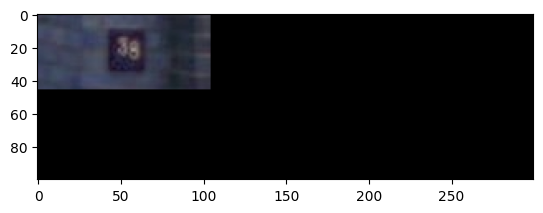

In [14]:
t = np.array(image_list[0].int())
t = np.moveaxis(np.array(image_list[0].int()), 0, 2)
plt.imshow(t)

In [10]:
print(len(classes_list))
print(classes_list[0].shape)
print(classes_list[0])

10000
torch.Size([2])
tensor([3., 8.], dtype=torch.float64)


In [11]:
print(len(annotations_list))
print(annotations_list[0].shape)
print(annotations_list[0])

10000
torch.Size([2, 4])
tensor([[0.1683, 0.1950, 0.0233, 0.1900],
        [0.1983, 0.2350, 0.0433, 0.1900]], dtype=torch.float64)


In [17]:
with open(f'{data_dir}/image_list', 'wb+') as f:
    pkl.dump(image_list, f)
    
with open(f'{data_dir}/classes_list', 'wb+') as f:
    pkl.dump(classes_list, f)
    
with open(f'{data_dir}/annotations_list', 'wb+') as f:
    pkl.dump(annotations_list, f)